In [17]:
# importing libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
%matplotlib inline

from sklearn.linear_model import LogisticRegression

In [3]:
# loading the data
digits = load_digits()

In [7]:
# determining the shape
print("Image Data Shape : ", digits.data.shape )
print("Label Data shape : ", digits.target.shape)

Image Data Shape :  (1797, 64)
Label Data shape :  (1797,)


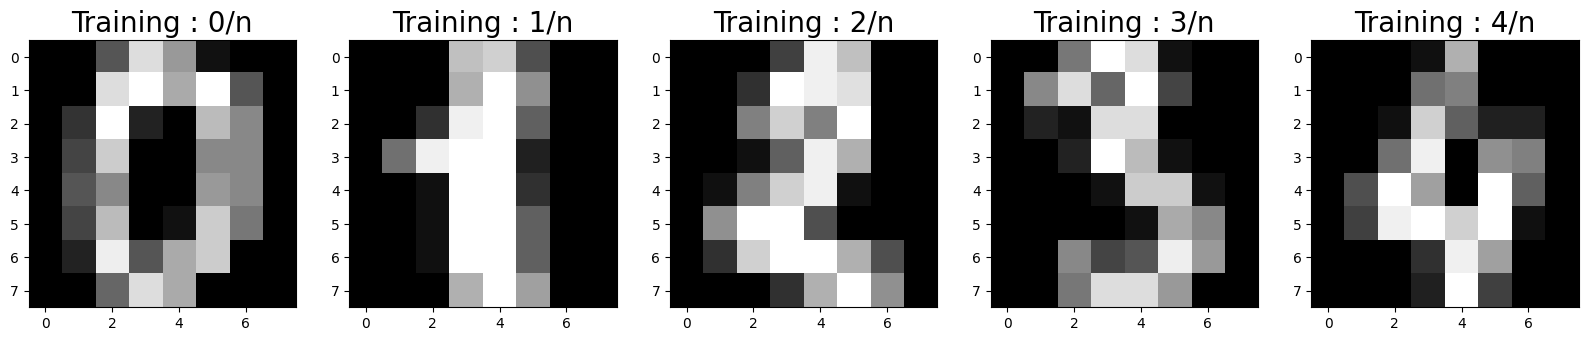

In [9]:
# displaying some of the images and labels
plt.figure(figsize  = (20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image , (8,8)), cmap = plt.cm.gray)
  plt.title("Training : %i/n" % label, fontsize = 20)

In [10]:
# dividing dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.30, random_state = 0)

In [11]:
# shapes of the training and testing datasets
print(X_train.shape)

(1257, 64)


In [12]:
print(y_train.shape)

(1257,)


In [13]:
print(X_test.shape)

(540, 64)


In [14]:
print(y_test.shape)

(540,)


In [18]:
# iniatilizing the logistic regression object
logisticRegr = LogisticRegression()

In [19]:
logisticRegr.fit(X_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# printing the logisticregression predicted value for a specific datapoint
print(logisticRegr.predict(X_test[0].reshape(1,-1)))

[2]


In [21]:
# predicting for some of the specific rows
logisticRegr.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [23]:
# predicting for thw whole dataset
predictions = logisticRegr.predict(X_test)

In [25]:
# checking the score of the testing
score = logisticRegr.score(X_test, y_test)

In [26]:
print(score)

0.9537037037037037


In [28]:
# the confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[45  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  2  1]
 [ 0  2 49  2  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  1  1]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 55  0  0  0  2]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  0  0  1  1  0  0 51  0  0]
 [ 0  3  1  0  0  0  0  0 53  4]
 [ 0  0  0  0  0  1  0  0  1 55]]


Text(0.5, 1.0, 'Accuracy_score : 0.9537037037037037')

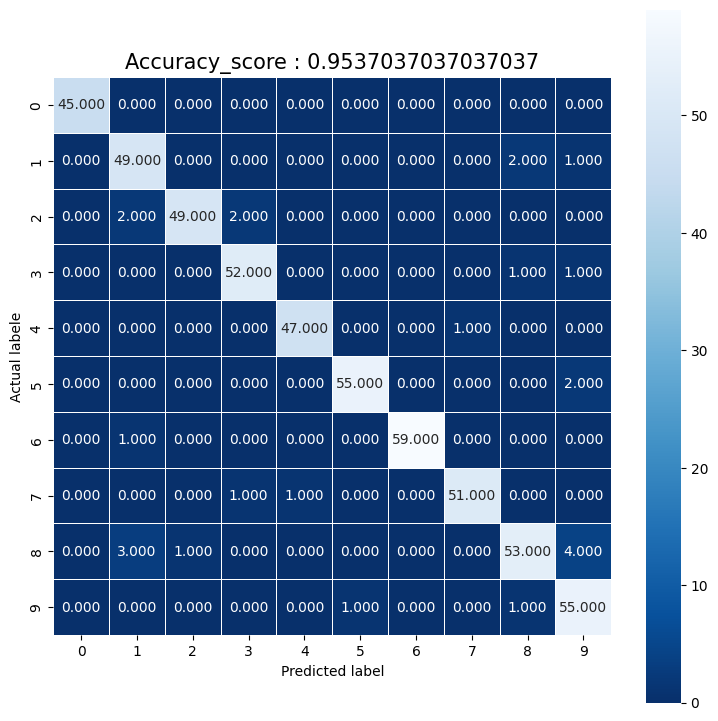

In [29]:
# representing the confusion matrix
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth = .5, square = True, cmap = "Blues_r")
plt.ylabel("Actual labele")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy_score : {0}".format(score)
plt.title(all_sample_title, size = 15)

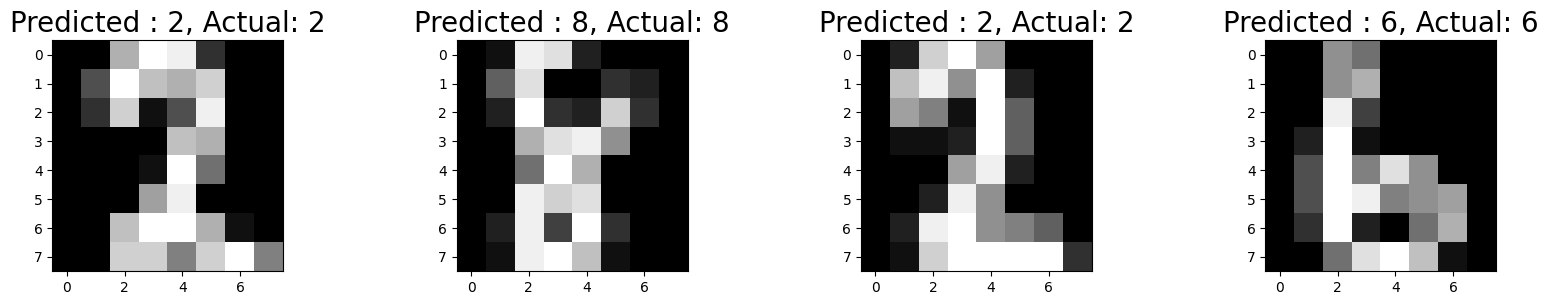

In [33]:
# displaying the output
index = 0
classifierIndex = []
for predict, actual in zip(predictions , y_test):
  if predict == actual:
    classifierIndex.append(index)
  index = index + 1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifierIndex[0:4]):
  plt.subplot(1, 4 , plotIndex + 1)
  plt.imshow(np.reshape(X_test[wrong], (8,8)),cmap=plt.cm.gray)
  plt.title("Predicted : {}, Actual: {}".format(predictions[wrong], y_test[wrong]),fontsize=20)